# CIVL 547 - Assignment 1
Equation of State

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1 and 2

In [2]:
#Plot  the  variation  of  the  density  of  pure  water  as  a  function  of  temperature using the UNESCO formula

#define variables
a0 = 999.842594
a1 = 6.793952 * 10**-2
a2 = -9.095290 * 10**-3
a3 = 1.001685 * 10**-4
a4 = -1.120083 * 10**-6
a5 = 6.536332 * 10**-9

T = np.linspace(-2,25,1000) #range suggested by assignment

rho = []

In [3]:
#compute
for i in range(len(T)):
    rho.append((a0)+(a1*T[i])+(a2*T[i]**2)+(a3*T[i]**3)+(a4*T[i]**4)+(a5*T[i]**5))

Text(0.5, 0, 'Temperature [deg C]')

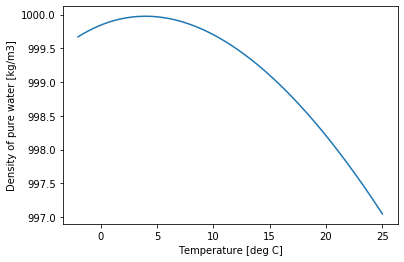

In [4]:
plt.plot(T,rho)
plt.ylabel('Density of pure water [kg/m3]')
plt.xlabel('Temperature [deg C]')

In [5]:
#what is the max density and at what temp does this occur?
rho_max = max(rho)
T_max = T[rho.index(rho_max)]
print('The maximum density of pure water is '+str(round(rho_max,3))+', this occurs at a temperature of '+str(round(T_max,3))+'.')

The maximum density of pure water is 999.975, this occurs at a temperature of 3.973.


## Question 3
First as a function of temperature

In [6]:
#define variables
b0 = 0.824493
b1 = -4.0899*10**-3
b2 = 7.6438*10**-5
b3 = -8.2467*10**-7
b4 = 5.3875*10**-9
c0 = -5.72466*10**-3
c1 = 1.0227*10**-4
c2 = -1.6546*10**-6
d0 = 4.8314*10**-4

S = 0

In [7]:
#compute
b = []
c = []
rho_UNESCO = []
rho_ROT = []
rho_newROT = []

for i in range(len(T)):
    #UNESCO equation density
    b.append(b0+(b1*T[i])+(b2*T[i]**2)+(b3*T[i]**3)+(b4*T[i]**4))
    c.append(c0+(c1*T[i])+(c2*T[i]**2))
    rho_UNESCO.append(rho[i] + b[i]*S + c[i]*S**(3/2) + d0*S**2)
    
    #rule of thumb equation density
    rho_ROT.append(1000-0.008*(T[i]-4)**2 + 0.8*S)
    
    #ROT with new coefficients
    rho_newROT.append(rho_max-0.0068*(T[i]-T_max)**2 + 0.8*S)

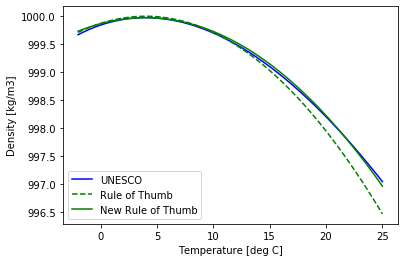

In [8]:
plt.plot(T, rho_UNESCO, c='b', label= 'UNESCO')
plt.plot(T,rho_ROT, c='g', ls='--', label='Rule of Thumb')
plt.plot(T,rho_newROT, c='g', label='New Rule of Thumb')
plt.xlabel('Temperature [deg C]')
plt.ylabel('Density [kg/m3]')
plt.legend()

Do again but with constant T (use a few different ones) and changing S

In [10]:
#set variables
T = 5 #to more easily compare to known given values
S = np.linspace(0,45,1000) #full range of salinities in Ocean
#compute
b = 0
c = 0
sigma_UNESCO = []
sigma_ROT = []
sigma_newROT = []

for i in range(len(S)):
    #UNESCO equation density
    b = b0+(b1*T)+(b2*T**2)+(b3*T**3)+(b4*T**4)
    c = c0+(c1*T)+(c2*T**2)
    sigma_UNESCO.append((rho[i] + b*S[i] + c*S[i]**(3/2) + d0*S[i]**2)-rho_max)
    
    #rule of thumb equation density
    sigma_ROT.append((1000-0.008*(T-4)**2 + 0.8*S[i])-rho_max)
    
    #ROT with new coefficients
    sigma_newROT.append((rho_max-0.0068*(T-T_max)**2 + 0.76*S[i])-rho_max)

Text(0.5, 0, 'Salinity [g/kg]')

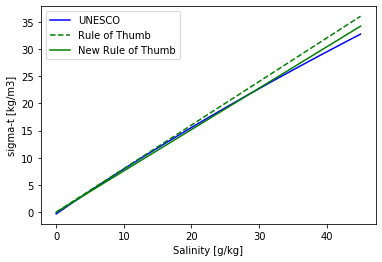

In [11]:
plt.plot(S, sigma_UNESCO, c='b', label= 'UNESCO')
plt.plot(S,sigma_ROT, c='g', ls='--', label='Rule of Thumb')
plt.plot(S,sigma_newROT, c='g', label='New Rule of Thumb')
plt.legend()
plt.ylabel('sigma-t [kg/m3]')
plt.xlabel('Salinity [g/kg]')

In [12]:
#now try with a few different options for T
T = [5,10,15,20]
S = np.linspace(0,45,1000) #full range of salinities in Ocean

#compute
b = 0
c = 0
sigma_UNESCO = np.empty([len(T),len(S)])
sigma_newROT = np.empty([len(T),len(S)])

for j in range(len(T)):
    for i in range(len(S)):
        #UNESCO equation density
        b = b0+(b1*T[j])+(b2*T[j]**2)+(b3*T[j]**3)+(b4*T[j]**4)
        c = c0+(c1*T[j])+(c2*T[j]**2)
        sigma_UNESCO[j,i] = (rho[i] + b*S[i] + c*S[i]**(3/2) + d0*S[i]**2)-rho_max
    
        #ROT with new coefficients
        sigma_newROT[j,i] = ((rho_max-0.0068*(T[j]-T_max)**2 + 0.76*S[i])-rho_max)

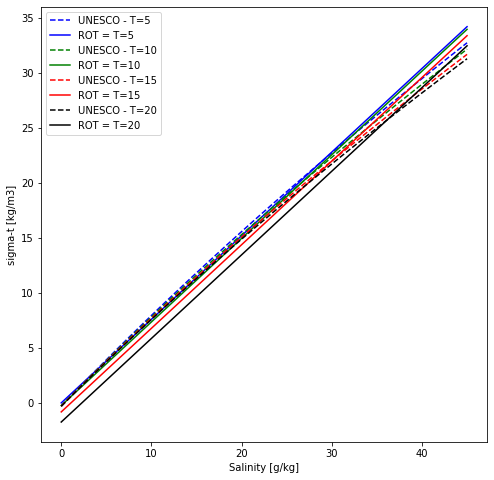

In [16]:
plt.figure(figsize = (8,8))
plt.plot(S, sigma_UNESCO[0,:], label = 'UNESCO - T=5', c='b' , ls = '--') #optimised for T=5
plt.plot(S, sigma_newROT[0,:], label = 'ROT = T=5', c='b' )
plt.plot(S, sigma_UNESCO[1,:], label = 'UNESCO - T=10', c= 'g', ls = '--')
plt.plot(S, sigma_newROT[1,:], label = 'ROT = T=10', c= 'g')
plt.plot(S, sigma_UNESCO[2,:], label = 'UNESCO - T=15', c= 'r', ls = '--')
plt.plot(S, sigma_newROT[2,:], label = 'ROT = T=15', c= 'r')
plt.plot(S, sigma_UNESCO[3,:], label = 'UNESCO - T=20', c= 'k', ls = '--')
plt.plot(S, sigma_newROT[3,:], label = 'ROT = T=20', c= 'k')
plt.ylabel('sigma-t [kg/m3]')
plt.xlabel('Salinity [g/kg]')
plt.legend()

In [13]:
#lets check to make sure this was calculated right
# ρ(0,5) = 999.96675 and ρ(35,5) = 1027.67547 (using UNESCO), so should be pretty close

print("at S=0 and T=5, density = " + str((rho_max-0.0068*(5-T_max)**2 + 0.79*0))+" kg/m3")
print("at S=35 and T=5, density = " + str((rho_max-0.0068*(5-T_max)**2 + 0.79*35))+" kg/m3")

at S=0 and T=5, density = 999.9677877196701 kg/m3
at S=35 and T=5, density = 1027.61778771967 kg/m3


## Question 4

In [22]:
#first recalc rho pure for the range of temp we want to work with
T = np.linspace(-30,30,1000) #range suggested by assignment
rho = []

for i in range(len(T)):
    rho.append((a0)+(a1*T[i])+(a2*T[i]**2)+(a3*T[i]**3)+(a4*T[i]**4)+(a5*T[i]**5))

In [23]:
#lets see first how UNESCO looks with a number of different salinities
#compute
b = []
c = []
S = [0,10,20,30,40]
rho_UNESCO = np.zeros([len(S), len(T)])

for j in range(len(S)):
    for i in range(len(T)):
        #UNESCO equation density
        b.append(b0+(b1*T[i])+(b2*T[i]**2)+(b3*T[i]**3)+(b4*T[i]**4))
        c.append(c0+(c1*T[i])+(c2*T[i]**2))
        rho_UNESCO[j,i] = (rho[i] + b[i]*S[j] + c[i]*S[j]**(3/2) + d0*S[j]**2)

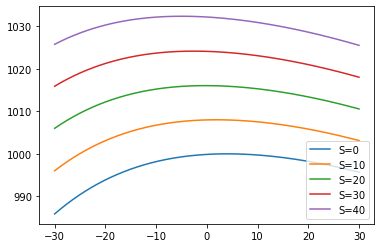

In [24]:
plt.plot(T,rho_UNESCO[0,:], label = "S=0")
plt.plot(T,rho_UNESCO[1,:], label = "S=10")
plt.plot(T,rho_UNESCO[2,:], label = "S=20")
plt.plot(T,rho_UNESCO[3,:], label = "S=30")
plt.plot(T,rho_UNESCO[4,:], label = "S=40")
plt.legend()

In [25]:
max(rho_UNESCO[0,:])
np.where(rho_UNESCO[0,:] == max(rho_UNESCO[0,:]))[0][0]
T[56]

-26.636636636636638

In [26]:
S = np.linspace(0,30,1000)
rho_temp = np.zeros([len(S), len(T)])
rho_max = []
T_max = []

for j in range(len(S)):
    for i in range(len(T)):
        #UNESCO equation density
        b = b0+(b1*T[i])+(b2*(T[i]**2))+(b3*(T[i]**3))+(b4*(T[i]**4))
        c = c0+(c1*T[i])+(c2*(T[i]**2))
        rho_temp[j,i] = (rho[i] + b*S[j] + c*(S[j]**(3/2)) + d0*(S[j]**2))
    rho_max.append(max(rho_temp[j,:]))
    T_max.append(T[np.where(rho_temp[j,:] == max(rho_temp[j,:]))[0][0]])

In [30]:
#out of curiosity lets get the freezing temperature plot too
T_freeze = [i*-0.052 for i in S]

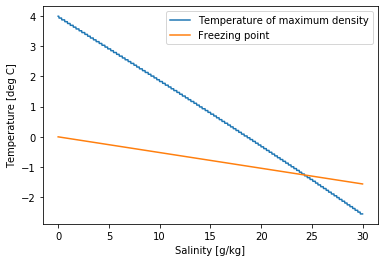

In [35]:
plt.plot(S,T_max, label='Temperature of maximum density')
plt.plot(S, T_freeze, label='Freezing point')
plt.ylabel('Temperature [deg C]')
plt.xlabel('Salinity [g/kg]')
plt.legend()